In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

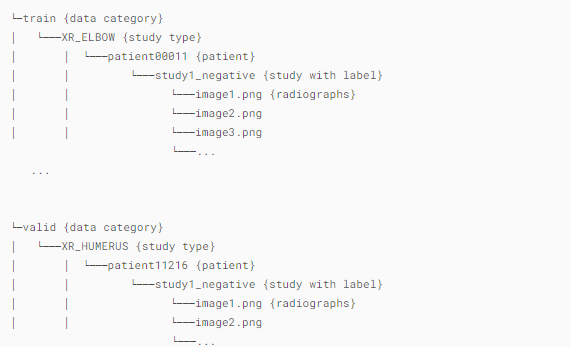

In [2]:
def load_path(path):
    dataset = [] 

    for body in os.listdir(path):
        body_part = body
        path_p = path+'/'+str(body)

        for id_p in os.listdir(path_p):

            patient_id = id_p

            path_id = path_p+'/'+str(id_p)

            for lab in os.listdir(path_id):
                if lab.split('_')[-1]=='positive': 
                    label = 1 
                elif lab.split('_')[-1]=='negative':
                    label= 0

                path_l = path_id+'/'+str(lab)

                for img in os.listdir(path_l):
                    img_path = path_l + '/' + str(img)

                    dataset.append(
                        {
                            'body_part': body_part,
                            'patient_id': patient_id,
                            'label': label,
                            'img_path': img_path
                        }
                    )
    return dataset

In [3]:
path = '/kaggle/input/mura-v11/MURA-v1.1/train'
os.listdir(path)

['XR_WRIST',
 'XR_FINGER',
 'XR_SHOULDER',
 'XR_HAND',
 'XR_FOREARM',
 'XR_HUMERUS',
 'XR_ELBOW']

In [4]:
path = '/kaggle/input/mura-v11/MURA-v1.1/train'
dataset = load_path(path)
df_train = pd.DataFrame(dataset)
df_train 

,body_part,patient_id,label,img_path
0,XR_WRIST,patient07547,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_WRIS...
1,XR_WRIST,patient07547,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_WRIS...
2,XR_WRIST,patient07547,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_WRIS...
3,XR_WRIST,patient07547,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_WRIS...
4,XR_WRIST,patient07547,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_WRIS...
...,...,...,...,...
36807,XR_ELBOW,patient05086,1,/kaggle/input/mura-v11/MURA-v1.1/train/XR_ELBO...
36808,XR_ELBOW,patient05086,1,/kaggle/input/mura-v11/MURA-v1.1/train/XR_ELBO...
36809,XR_ELBOW,patient05950,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_ELBO...
36810,XR_ELBOW,patient05950,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_ELBO...


In [5]:
dataset_test = load_path(path = '/kaggle/input/mura-v11/MURA-v1.1/valid')
df_test = pd.DataFrame(dataset_test)
df_test

,body_part,patient_id,label,img_path
0,XR_WRIST,patient11268,1,/kaggle/input/mura-v11/MURA-v1.1/valid/XR_WRIS...
1,XR_WRIST,patient11268,1,/kaggle/input/mura-v11/MURA-v1.1/valid/XR_WRIS...
2,XR_WRIST,patient11268,1,/kaggle/input/mura-v11/MURA-v1.1/valid/XR_WRIS...
3,XR_WRIST,patient11302,0,/kaggle/input/mura-v11/MURA-v1.1/valid/XR_WRIS...
4,XR_WRIST,patient11380,0,/kaggle/input/mura-v11/MURA-v1.1/valid/XR_WRIS...
...,...,...,...,...
3192,XR_ELBOW,patient11866,0,/kaggle/input/mura-v11/MURA-v1.1/valid/XR_ELBO...
3193,XR_ELBOW,patient11414,1,/kaggle/input/mura-v11/MURA-v1.1/valid/XR_ELBO...
3194,XR_ELBOW,patient11414,1,/kaggle/input/mura-v11/MURA-v1.1/valid/XR_ELBO...
3195,XR_ELBOW,patient11869,0,/kaggle/input/mura-v11/MURA-v1.1/valid/XR_ELBO...


In [6]:
print('We have '+str(len(df_train))+' train images')

We have 36812 train images


In [7]:
training_data_distr = []


In [8]:
def count_distrib(df_body, body_name):
    grouped = df_body.groupby(df_body.label)
    
    pos = len(grouped.get_group(1))
    
    print('We have ' +str(pos)+ ' positive '+ body_name)
    
    print('vs')
    
    neg = len(grouped.get_group(0))
    print( 'We have ' +str(neg)+ ' negative '+ body_name)
    
    total = len(df_body)
    
    return body_name, pos, neg, total

In [9]:
grouped = df_train.groupby(df_train.body_part)
df_XR_ELBOW = grouped.get_group("XR_ELBOW")
df_XR_ELBOW.head(4)

,body_part,patient_id,label,img_path
31881,XR_ELBOW,patient05626,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_ELBO...
31882,XR_ELBOW,patient05626,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_ELBO...
31883,XR_ELBOW,patient06133,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_ELBO...
31884,XR_ELBOW,patient06133,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_ELBO...


In [10]:
body_name, pos, neg, total = count_distrib(df_XR_ELBOW, 'XR_ELBOW')

training_data_distr.append(
                    {
                    'body_part': body_name,
                    'positive': pos,
                    'negative': neg,
                    'total':total
                    })

We have 2006 positive XR_ELBOW
vs
We have 2925 negative XR_ELBOW


In [11]:
df_XR_FINGER = grouped.get_group("XR_FINGER")
df_XR_FINGER.head(4)

,body_part,patient_id,label,img_path
9756,XR_FINGER,patient04480,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_FING...
9757,XR_FINGER,patient04480,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_FING...
9758,XR_FINGER,patient04480,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_FING...
9759,XR_FINGER,patient04453,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_FING...


In [12]:
print("Number of training XR_FINGER: ",len(df_XR_FINGER))

Number of training XR_FINGER:  5106


In [13]:
body_name, pos, neg, total = count_distrib(df_XR_FINGER, 'XR_FINGER')

training_data_distr.append(
                    {
                    'body_part': body_name,
                    'positive': pos,
                    'negative': neg,
                    'total':total
                    })

We have 1968 positive XR_FINGER
vs
We have 3138 negative XR_FINGER


In [14]:
df_XR_FOREARM = grouped.get_group("XR_FOREARM")
df_XR_FOREARM.head(4)

,body_part,patient_id,label,img_path
28784,XR_FOREARM,patient05601,1,/kaggle/input/mura-v11/MURA-v1.1/train/XR_FORE...
28785,XR_FOREARM,patient05601,1,/kaggle/input/mura-v11/MURA-v1.1/train/XR_FORE...
28786,XR_FOREARM,patient05601,1,/kaggle/input/mura-v11/MURA-v1.1/train/XR_FORE...
28787,XR_FOREARM,patient06858,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_FORE...


In [15]:
print("Number of training XR_FOREARM: ",len(df_XR_FOREARM))

Number of training XR_FOREARM:  1825


In [16]:
body_name, pos, neg, total = count_distrib(df_XR_FOREARM, 'XR_FOREARM')

training_data_distr.append(
                    {
                    'body_part': body_name,
                    'positive': pos,
                    'negative': neg,
                    'total':total
                    })

We have 661 positive XR_FOREARM
vs
We have 1164 negative XR_FOREARM


In [17]:
df_XR_HAND = grouped.get_group("XR_HAND")
df_XR_HAND.head(10)

,body_part,patient_id,label,img_path
23241,XR_HAND,patient09779,1,/kaggle/input/mura-v11/MURA-v1.1/train/XR_HAND...
23242,XR_HAND,patient09779,1,/kaggle/input/mura-v11/MURA-v1.1/train/XR_HAND...
23243,XR_HAND,patient10150,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_HAND...
23244,XR_HAND,patient10150,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_HAND...
23245,XR_HAND,patient10150,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_HAND...
23246,XR_HAND,patient11131,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_HAND...
23247,XR_HAND,patient11131,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_HAND...
23248,XR_HAND,patient10069,1,/kaggle/input/mura-v11/MURA-v1.1/train/XR_HAND...
23249,XR_HAND,patient10069,1,/kaggle/input/mura-v11/MURA-v1.1/train/XR_HAND...
23250,XR_HAND,patient10069,1,/kaggle/input/mura-v11/MURA-v1.1/train/XR_HAND...


In [18]:
print("Number of training XR_HAND: ",len(df_XR_HAND))

Number of training XR_HAND:  5543


In [19]:
body_name, pos, neg, total = count_distrib(df_XR_HAND, 'XR_HAND')

training_data_distr.append(
                    {
                    'body_part': body_name,
                    'positive': pos,
                    'negative': neg,
                    'total':total
                    })

We have 1484 positive XR_HAND
vs
We have 4059 negative XR_HAND


In [20]:
df_XR_HUMERUS = grouped.get_group("XR_HUMERUS")
df_XR_HUMERUS.head(5)

,body_part,patient_id,label,img_path
30609,XR_HUMERUS,patient03016,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUME...
30610,XR_HUMERUS,patient03016,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUME...
30611,XR_HUMERUS,patient03016,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUME...
30612,XR_HUMERUS,patient02935,1,/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUME...
30613,XR_HUMERUS,patient02935,1,/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUME...


In [21]:
body_name, pos, neg, total = count_distrib(df_XR_HUMERUS, 'XR_HUMERUS')

training_data_distr.append(
                    {
                    'body_part': body_name,
                    'positive': pos,
                    'negative': neg,
                    'total':total
                    })

We have 599 positive XR_HUMERUS
vs
We have 673 negative XR_HUMERUS


In [22]:
print("Number of training XR_HUMERUS: ",len(df_XR_HUMERUS))

Number of training XR_HUMERUS:  1272


In [23]:
df_XR_SHOULDER = grouped.get_group("XR_SHOULDER")
df_XR_SHOULDER.head(4)

,body_part,patient_id,label,img_path
14862,XR_SHOULDER,patient00734,1,/kaggle/input/mura-v11/MURA-v1.1/train/XR_SHOU...
14863,XR_SHOULDER,patient00746,1,/kaggle/input/mura-v11/MURA-v1.1/train/XR_SHOU...
14864,XR_SHOULDER,patient00746,1,/kaggle/input/mura-v11/MURA-v1.1/train/XR_SHOU...
14865,XR_SHOULDER,patient00746,1,/kaggle/input/mura-v11/MURA-v1.1/train/XR_SHOU...


In [24]:
print("Number of training XR_SHOULDER: ",len(df_XR_SHOULDER))

Number of training XR_SHOULDER:  8379


In [25]:
body_name, pos, neg, total = count_distrib(df_XR_SHOULDER, 'XR_SHOULDER')

training_data_distr.append(
                    {
                    'body_part': body_name,
                    'positive': pos,
                    'negative': neg,
                    'total':total
                    })

We have 4168 positive XR_SHOULDER
vs
We have 4211 negative XR_SHOULDER


In [26]:
df_XR_WRIST = grouped.get_group("XR_WRIST")
df_XR_WRIST.head(4)

,body_part,patient_id,label,img_path
0,XR_WRIST,patient07547,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_WRIS...
1,XR_WRIST,patient07547,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_WRIS...
2,XR_WRIST,patient07547,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_WRIS...
3,XR_WRIST,patient07547,0,/kaggle/input/mura-v11/MURA-v1.1/train/XR_WRIS...


In [27]:
print("Number of training XR_WRIST: ",len(df_XR_WRIST))

Number of training XR_WRIST:  9756


In [28]:
body_name, pos, neg, total = count_distrib(df_XR_WRIST, 'XR_WRIST')

training_data_distr.append(
                    {
                    'body_part': body_name,
                    'positive': pos,
                    'negative': neg,
                    'total':total
                    })

We have 3987 positive XR_WRIST
vs
We have 5769 negative XR_WRIST


In [29]:
training_data_distr = pd.DataFrame(training_data_distr)
training_data_distr['percentage'] = round(100 * training_data_distr['total'] / len(df_train.body_part), 2)
print('Training Data Distribution')
training_data_distr

Training Data Distribution


,body_part,positive,negative,total,percentage
0,XR_ELBOW,2006,2925,4931,13.40
1,XR_FINGER,1968,3138,5106,13.87
2,XR_FOREARM,661,1164,1825,4.96
3,XR_HAND,1484,4059,5543,15.06
4,XR_HUMERUS,599,673,1272,3.46
5,XR_SHOULDER,4168,4211,8379,22.76
6,XR_WRIST,3987,5769,9756,26.50


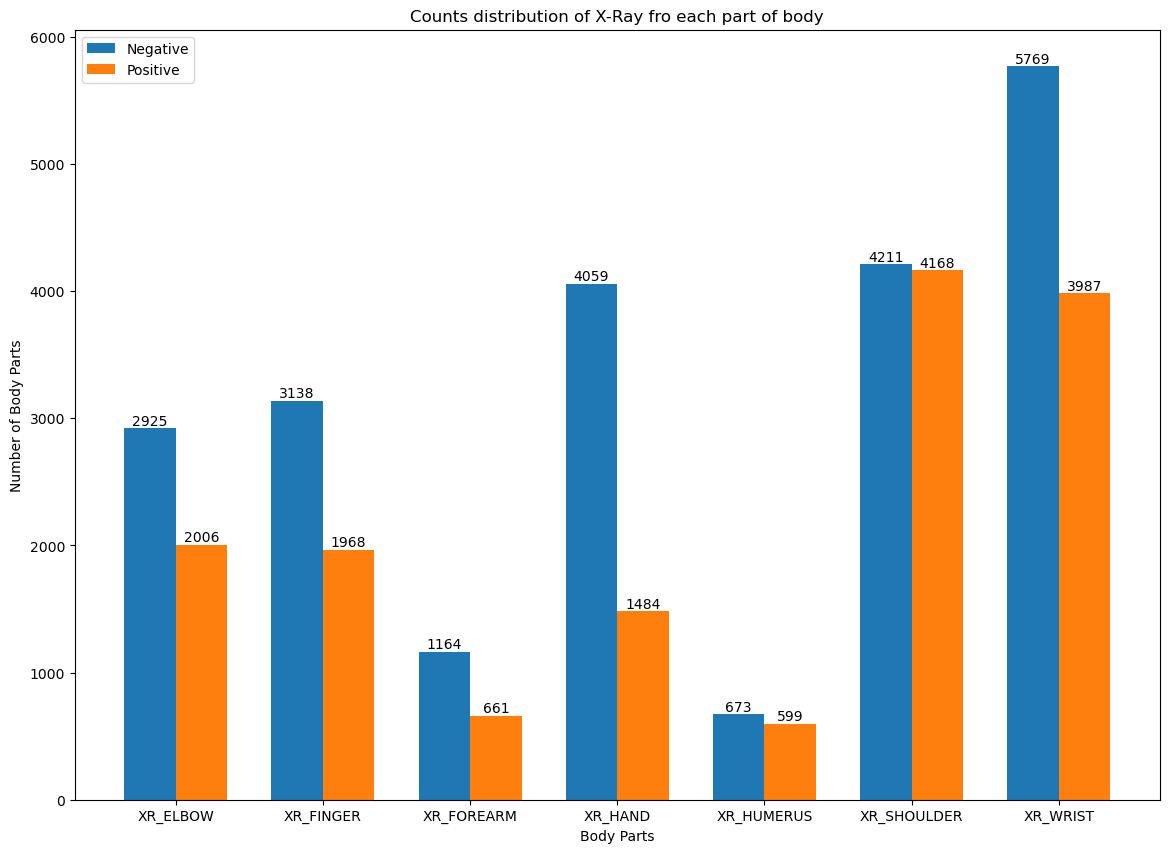

In [30]:
labels = training_data_distr['body_part']
negative = training_data_distr['negative']
positive = training_data_distr['positive']

x = np.arange(len(labels))
width = 0.35

fig = plt.figure(figsize=(14, 10))

ax = fig.subplots()
rects1 = ax.bar(x - width/2, negative, width, label='Negative')
rects2 = ax.bar(x + width/2, positive, width, label='Positive')
ax.set_ylabel('Number of Body Parts')
ax.set_xlabel('Body Parts')
ax.set_title('Counts distribution of X-Ray fro each part of body')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.00*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [31]:
grouped = df_train.groupby(df_train.label)
    
pos = len(grouped.get_group(1))
neg = len(grouped.get_group(0))

In [32]:
print("Number of positives:",pos)
print("Number of negatives:",neg)

Number of positives: 14873
Number of negatives: 21939


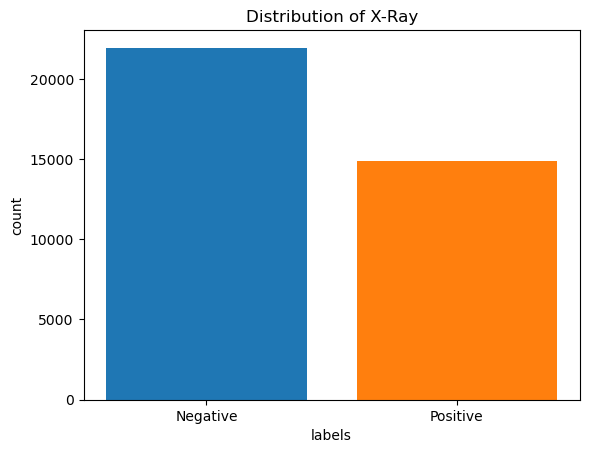

In [33]:
categories = ["Negative"]
values     = [ neg]

categories2 = ["Positive"]
values2     = [  pos]

plt.bar(categories, values)
plt.bar(categories2, values2)
plt.title('Distribution of X-Ray')
plt.xlabel('labels')
plt.ylabel('count')


plt.show()


In [34]:
grouped = df_train.groupby(df_test.label)
    
pos = len(grouped.get_group(1))
neg = len(grouped.get_group(0))

In [35]:
print("Number of positives:",pos)
print("Number of negatives:",neg)

Number of positives: 1530
Number of negatives: 1667


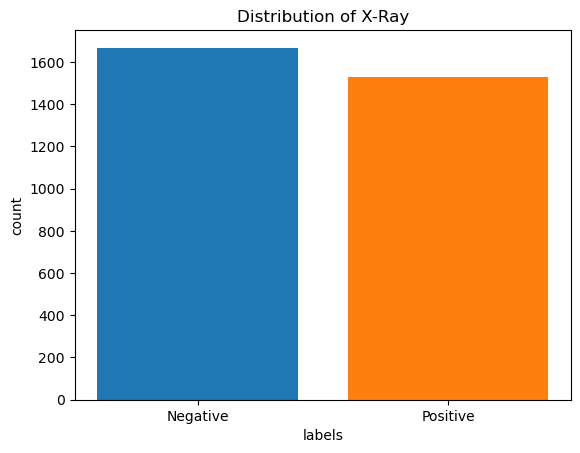

In [36]:
categories = ["Negative"]
values     = [ neg]

categories2 = ["Positive"]
values2     = [  pos]

plt.bar(categories, values)
plt.bar(categories2, values2)
plt.title('Distribution of X-Ray')
plt.xlabel('labels')
plt.ylabel('count')


plt.show()


In [37]:
print("Number of body parts training images : ")
categories_counts = pd.DataFrame(df_train['body_part'].value_counts())
print ('\n\ncategories:\n',categories_counts )

Number of body parts training images : 


categories:
              body_part
XR_WRIST          9756
XR_SHOULDER       8379
XR_HAND           5543
XR_FINGER         5106
XR_ELBOW          4931
XR_FOREARM        1825
XR_HUMERUS        1272


In [38]:
print("Number of body parts testing images : ")
categories_counts = pd.DataFrame(df_test['body_part'].value_counts())
print ('\n\ncategories:\n',categories_counts )

Number of body parts testing images : 


categories:
              body_part
XR_WRIST           659
XR_SHOULDER        563
XR_ELBOW           465
XR_FINGER          461
XR_HAND            460
XR_FOREARM         301
XR_HUMERUS         288


In [40]:
from keras.preprocessing.image import ImageDataGenerator
datagen =ImageDataGenerator()
x_train_dataset = datagen.flow_from_directory('/kaggle/input/mura-v11/MURA-v1.1/train',
                                                   batch_size =500,
                                                  target_size = (256,256),
                                                  shuffle =True)
x_train,y_train=x_train_dataset.next()

Found 36812 images belonging to 7 classes.


In [41]:
x_test_dataset = datagen.flow_from_directory("/kaggle/input/mura-v11/MURA-v1.1/valid", 
                                                batch_size =500,  
                                                target_size = (256,256),
                                                shuffle =True)
x_test,y_test=x_test_dataset.next()

Found 3197 images belonging to 7 classes.


In [42]:
x_train[0].shape

(256, 256, 3)

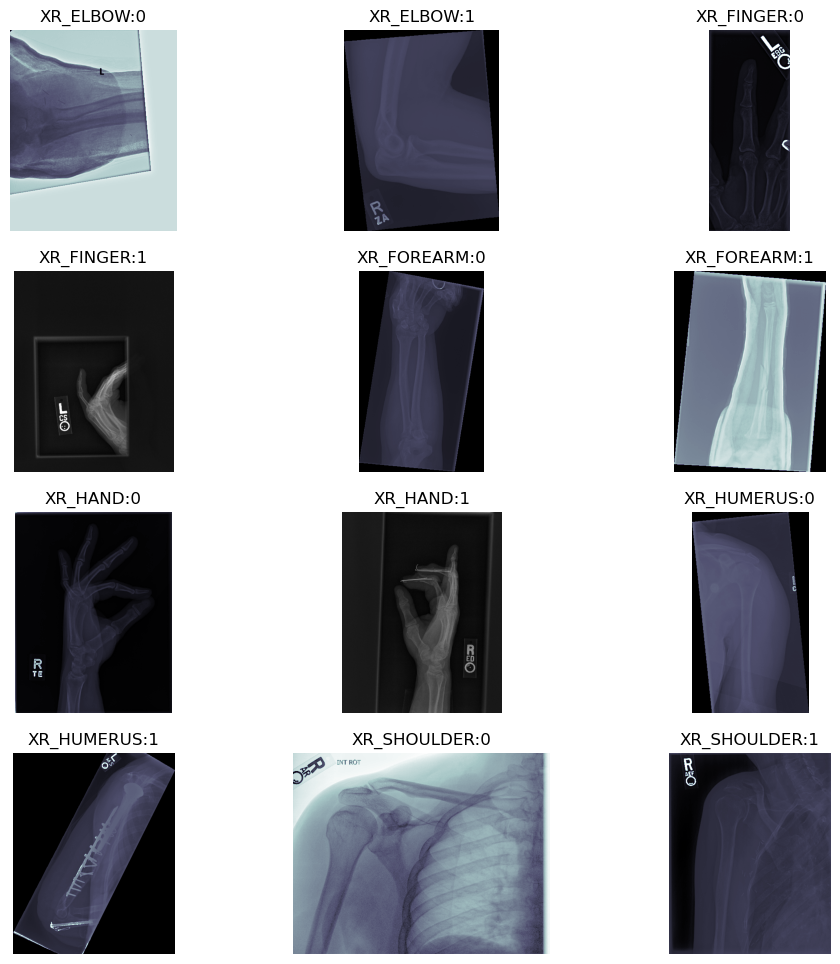

In [43]:
from skimage.io import imread
sub_df = df_train.groupby(['body_part', 'label']).apply(lambda x: x.sample(1)).reset_index(drop = True)
fig, (m_axs) = plt.subplots(4, sub_df.shape[0]//4, figsize = (12, 12))
for c_ax, (_, c_row) in zip(m_axs.flatten(), sub_df.iterrows()):
    c_ax.imshow(imread(c_row['img_path']), cmap = 'bone')
    c_ax.axis('off')
    c_ax.set_title('{body_part}:{label}'.format(**c_row))

In [44]:
x_train[0].shape,x_train[1].shape

((256, 256, 3), (256, 256, 3))

In [45]:
y_train=y_train.astype('int32')

In [46]:
y_test=y_test.astype('int32')
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int32)

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,AveragePooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization,MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
model=Sequential()
model.add(Conv2D(150,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Conv2D(250,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(120,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(7,activation='softmax'))
es = EarlyStopping(monitor='val_loss',verbose=1,patience=20)

In [48]:
model.compile(loss='categorical_crossentropy',
optimizer='adam',metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 150)     4200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 150)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 100)     135100    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 100)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 62, 62, 100)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 250)       2

In [50]:
history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),callbacks=[es])

Epoch 1/5
16/16 [==============================] - 211s 13s/step - loss: 49.3642 - accuracy: 0.1920 - val_loss: 1.9076 - val_accuracy: 0.2240
Epoch 2/5
16/16 [==============================] - 208s 13s/step - loss: 1.8016 - accuracy: 0.2920 - val_loss: 1.8747 - val_accuracy: 0.2940
Epoch 3/5
16/16 [==============================] - 206s 13s/step - loss: 1.5241 - accuracy: 0.4120 - val_loss: 1.7457 - val_accuracy: 0.3300
Epoch 4/5
16/16 [==============================] - 209s 13s/step - loss: 1.1416 - accuracy: 0.5800 - val_loss: 1.7582 - val_accuracy: 0.3640
Epoch 5/5
16/16 [==============================] - 207s 13s/step - loss: 0.8422 - accuracy: 0.7300 - val_loss: 1.8692 - val_accuracy: 0.3660


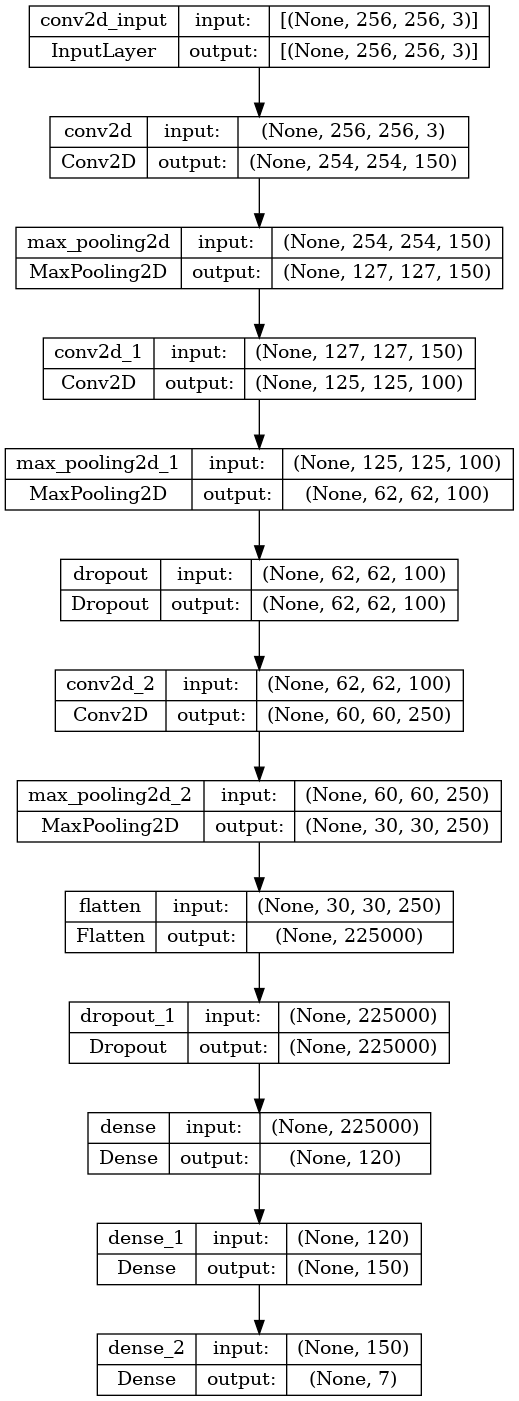

In [51]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [52]:
model.evaluate(x_train,y_train)

16/16 [==============================] - 45s 3s/step - loss: 0.5549 - accuracy: 0.8720


[0.5548940896987915, 0.871999979019165]

In [53]:
model.evaluate(x_test,y_test)

16/16 [==============================] - 44s 3s/step - loss: 1.8692 - accuracy: 0.3660


[1.86919105052948, 0.3659999966621399]

In [61]:
y_pred= model.predict(x_test)

16/16 [==============================] - 45s 3s/step


In [97]:
y_pred1 = (y_pred > 0.5) #greater than 0.50 on scale 0 to 1
print(y_pred1)

[[False False False ... False False False]
 [False  True False ... False False False]
 [False False False ... False False  True]
 ...
 [False  True False ... False False False]
 [ True False False ... False False False]
 [False False False ... False False False]]


In [105]:
x = []
for i in y_pred1:
     #print(np.argmax(i))
        x.append(np.argmax(i))
print(x)

[3, 1, 6, 6, 0, 6, 5, 0, 6, 0, 0, 1, 0, 6, 6, 6, 5, 5, 0, 5, 0, 6, 0, 6, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 6, 0, 0, 5, 3, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 5, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 6, 0, 0, 0, 0, 3, 0, 0, 5, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 5, 0, 0, 3, 0, 5, 0, 0, 0, 0, 0, 3, 0, 0, 5, 0, 3, 0, 0, 6, 0, 1, 6, 0, 0, 0, 6, 0, 3, 6, 6, 0, 0, 0, 5, 0, 0, 0, 5, 3, 0, 4, 1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 0, 5, 0, 0, 0, 0, 6, 0, 0, 5, 0, 5, 6, 5, 0, 5, 0, 0, 1, 0, 0, 5, 0, 0, 0, 0, 6, 0, 0, 0, 0, 6, 0, 3, 0, 0, 0, 0, 6, 0, 0, 1, 6, 0, 0, 3, 1, 0, 0, 0, 0, 0, 5, 0, 3, 0, 0, 5, 0, 0, 0, 0, 3, 6, 0, 1, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 1, 6, 0, 0, 5, 1, 0, 0, 0, 0, 6, 0, 0, 1, 0, 6, 6, 6, 0, 0, 0, 6, 0, 6, 6, 1, 0, 0, 0, 0, 6, 0, 0, 0, 6, 6, 1, 0, 5, 6, 6, 6, 0, 3, 5, 0, 0, 0, 5, 0, 3, 0, 1, 6, 5, 0, 6, 0, 5, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 6, 5, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 6, 

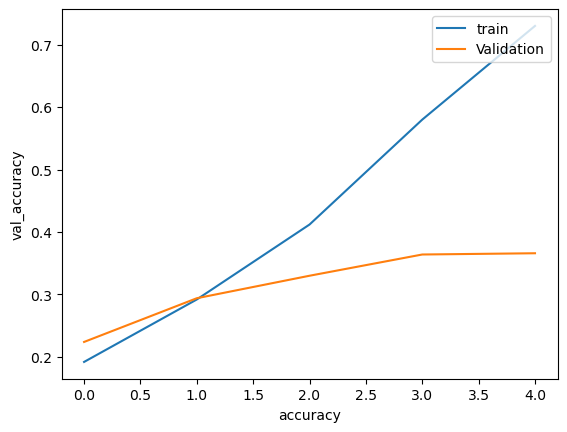

In [68]:
plt.xlabel("accuracy")
plt.ylabel("val_accuracy")
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(['train', 'Validation'], loc='upper right')
plt.show()

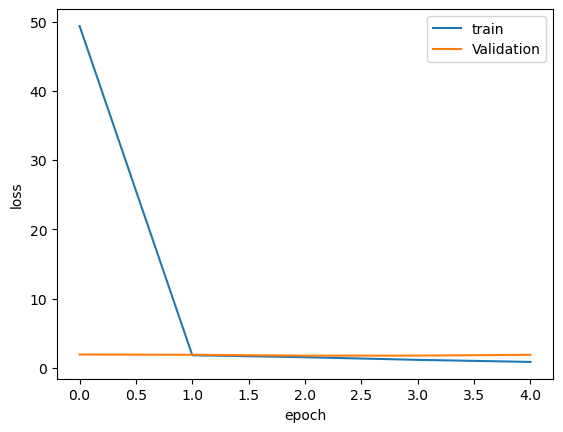

In [69]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(['train', 'Validation'], loc='upper right')
plt.show()

Shape of the image: (512, 365, 3)


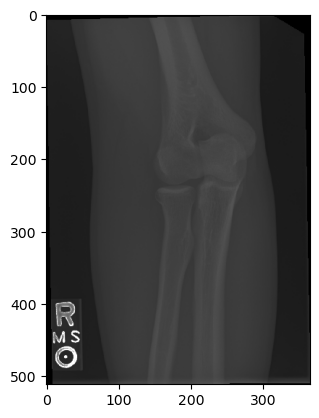

In [71]:
#Prediction
import cv2
#from google.colab.patches import cv2_imshow
image=cv2.imread('/kaggle/input/mura-v11/MURA-v1.1/train/XR_ELBOW/patient00026/study1_negative/image2.png')
plt.imshow(image)
print("Shape of the image:",image.shape)

In [72]:
#resizing of the image
re=cv2.resize(image,(256,256))
#Reshape
img = re.reshape(-1,256,256,3)
print("Shape of the image:",img.shape)

Shape of the image: (1, 256, 256, 3)


In [73]:
p=model.predict(img)

1/1 [==============================] - 0s 204ms/step


In [74]:
print("Predicted class index: ",np.argmax(p))

Predicted class index:  6


Shape of the image: (512, 406, 3)


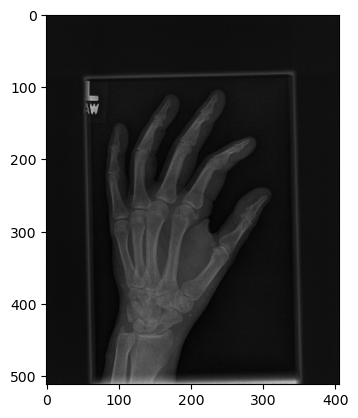

In [75]:
image1=cv2.imread('/kaggle/input/mura-v11/MURA-v1.1/train/XR_HAND/patient00008/study1_positive/image1.png')
plt.imshow(image1)
print("Shape of the image:",image1.shape)

In [76]:
#resizing of the image
re=cv2.resize(image1,(256,256))
#Reshape
img1 = re.reshape(-1,256,256,3)
print("Shape of the image:",img1.shape)

Shape of the image: (1, 256, 256, 3)


In [77]:
p1=model.predict(img1)
print("Predicted class index: ",np.argmax(p1))

1/1 [==============================] - 0s 118ms/step
Predicted class index:  3


In [78]:
x_train_dataset.class_indices

{'XR_ELBOW': 0,
 'XR_FINGER': 1,
 'XR_FOREARM': 2,
 'XR_HAND': 3,
 'XR_HUMERUS': 4,
 'XR_SHOULDER': 5,
 'XR_WRIST': 6}

1/1 [==============================] - 0s 122ms/step
THE UPLOADED X-RAY IMAGE IS: Normal or 1


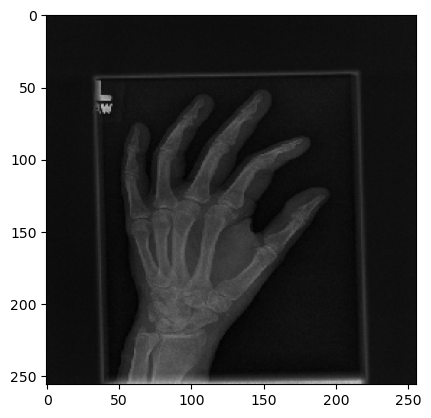

In [116]:
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/kaggle/input/mura-v11/MURA-v1.1/train/XR_HAND/patient00008/study1_positive/image1.png',target_size=(256,256))
imag = img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
a=ypred[0].all()
if a<0.5:
      op="Abnoraml or 0"   
else:
      op="Normal or 1"
plt.imshow(img)
print("THE UPLOADED X-RAY IMAGE IS: "+str(op))

Shape of the image: (900, 1600, 3)


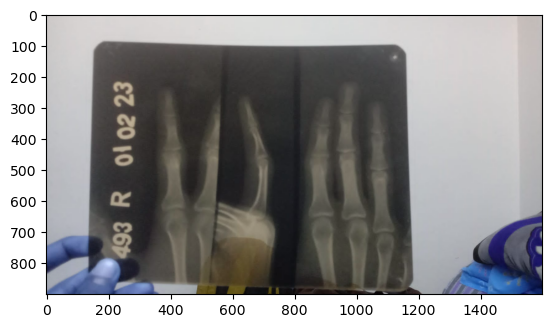

In [80]:
image1=cv2.imread('/kaggle/input/finger/fig-xay.jpg')
plt.imshow(image1)
print("Shape of the image:",image1.shape)

In [117]:
#resizing of the image
re=cv2.resize(image1,(256,256))
#Reshape
img2 = re.reshape(-1,256,256,3)
print("Shape of the image:",img2.shape)
print()
p2=model.predict(img2)
print("Predicted class index: ",np.argmax(p2))

Shape of the image: (1, 256, 256, 3)

1/1 [==============================] - 0s 144ms/step
Predicted class index:  6


1/1 [==============================] - 0s 124ms/step
THE UPLOADED X-RAY IMAGE IS: Abnoraml or 0


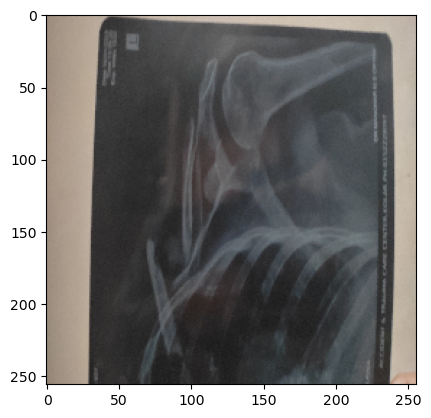

In [127]:
from keras.preprocessing import image
import keras.utils as image
from keras.utils import load_img, img_to_array
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model1 = model
img = load_img("/kaggle/input/shoulder/sholderxray.jpg",target_size=(256,256))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
a=classes.all()
if a>0.5:
      op="Abnoraml or 0"   
else:
      op="Normal or 1"
plt.imshow(img)
print("THE UPLOADED X-RAY IMAGE IS: "+str(op))

1/1 [==============================] - 0s 143ms/step
THE UPLOADED X-RAY IMAGE IS: Normal or 1


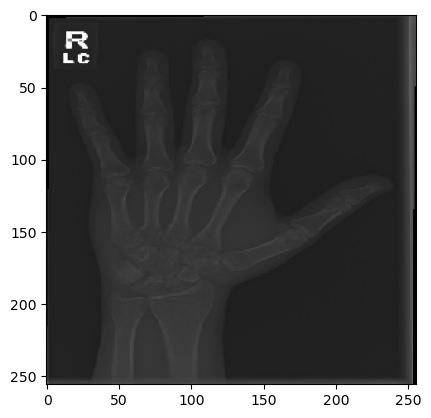

In [126]:
img = load_img("/kaggle/input/mura-v11/MURA-v1.1/valid/XR_HAND/patient11190/study1_negative/image2.png",target_size=(256,256,3))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
a=classes.all()
if a<0.5:
      op="Abnoraml or 0"   
else:
      op="Normal or 1"
plt.imshow(img)
print("THE UPLOADED X-RAY IMAGE IS: "+str(op))